In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Model class that inherits nn.Module
class Model(nn.Module):
    #Input layer (mass 1, mass 2, etc.) --> Hidden Layer1 (certain # of neurons) --> H2 (certain # of neurons) --> output (3 classes of gravitational waves)
    def __init__(self, in_features=28, h1=8, h2=9, out_features=3):
        super().__init__() # Instantiates the nn.module
        self.fc1 = nn.Linear(in_features, h1)
        self.fcs2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fcs2(x))
        x = self.out(x)

        return x

In [3]:
# Pick a starting class
torch.manual_seed(69)

# Create an instance of the model
model = Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
url = "Cleaned_Data - Confident_Significant_Events_GW.csv"
df = pd.read_csv(url)
df.isnull().sum()
missing_values = [np.NaN]
df.isnull().any()

commonName                          False
Type                                False
mass_1_source                       False
mass_1_source_lower                 False
mass_1_source_upper                 False
mass_2_source                       False
mass_2_source_lower                 False
mass_2_source_upper                 False
network_matched_filter_snr          False
network_matched_filter_snr_lower     True
network_matched_filter_snr_upper     True
luminosity_distance                 False
luminosity_distance_lower           False
luminosity_distance_upper           False
chi_eff                             False
chi_eff_lower                       False
chi_eff_upper                       False
total_mass_source                    True
total_mass_source_lower              True
total_mass_source_upper              True
chirp_mass_source                   False
chirp_mass_source_lower             False
chirp_mass_source_upper             False
redshift                          

In [6]:
df = df.dropna()


In [7]:
# Changed type from string to "integers"
df['Type'] = df['Type'].replace('Binary Black Hole Collision', 0.0)
df['Type'] = df['Type'].replace('Binary Neutron Star Collision', 1.0)
df['Type'] = df['Type'].replace('Binary Black Hole & Neutron Star Collision', 2.0)

In [8]:
# Train Test Split, set x, y 
x = df.drop('Type', axis=1).drop('commonName', axis=1)
y = df['Type']

In [9]:
# Convert to numpy arrays
x = x.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [12]:
# Convert x to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [13]:
# Convert y to tensors long (allows for more stuff)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose an optimizer (like gradient descent), set learning rate (lr) [if error doesn't go down after iterations (epochs), might want to lower lr]
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [29]:
# Time to train model!!
# Epochs? (one run through all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
    # Go forwards and get prediction
    y_pred = model.forward(x_train) # Get predicted results

    # Measure the error (will be high initially)
    loss = criterion(y_pred, y_train) # Predicted value versus training data

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} & Loss : {loss}')
    
    # some back propagation: Gradient descent stuff (fine tune the neural networks)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 & Loss : 0.0015222766669467092
Epoch: 10 & Loss : 0.0014957382809370756
Epoch: 20 & Loss : 0.0014695101417601109
Epoch: 30 & Loss : 0.0014420030638575554
Epoch: 40 & Loss : 0.0014158161357045174
Epoch: 50 & Loss : 0.0013926011743023992
Epoch: 60 & Loss : 0.0013672345085069537
Epoch: 70 & Loss : 0.0013428033562377095
Epoch: 80 & Loss : 0.0013189752353355289
Epoch: 90 & Loss : 0.001297018607147038
Epoch: 100 & Loss : 0.0012747392756864429
Epoch: 110 & Loss : 0.0012544745113700628
Epoch: 120 & Loss : 0.001234734314493835
Epoch: 130 & Loss : 0.0012122663902118802
Epoch: 140 & Loss : 0.0011945107253268361
Epoch: 150 & Loss : 0.0011743501527234912
Epoch: 160 & Loss : 0.001154184341430664
Epoch: 170 & Loss : 0.001137557439506054
Epoch: 180 & Loss : 0.0011176811531186104
Epoch: 190 & Loss : 0.0011001847451552749


Text(0.5, 0, 'epoch')

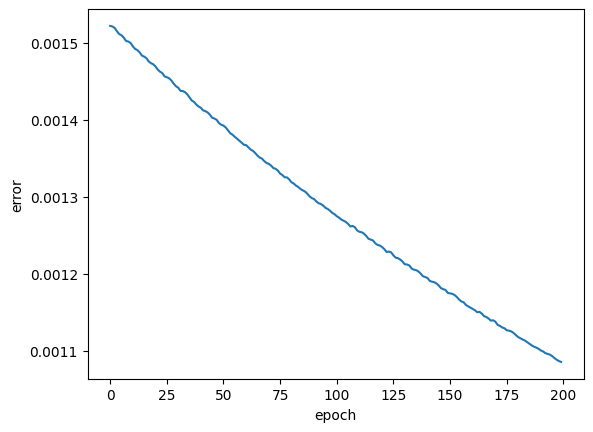

In [30]:
# Graph stuff out
plt.plot(range(epochs), losses)
plt.ylabel("error")
plt.xlabel("epoch")

In [31]:
# Evaluate Model on Test Data set
with torch.no_grad(): # Turns off backpropagation
    y_eval = model.forward(x_test) # x_test are features from test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # Find error

In [32]:
loss

tensor(3.7922e-06)

In [33]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)

        # Tells us type of gravitational wave our nn thinks it is
        print(f'{i + 1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct')

1.) tensor([  9.2028, -48.5312, -27.6746]) 	 0 	 0
2.) tensor([  1.5174, -19.5494,  -8.1992]) 	 0 	 0
3.) tensor([ 16.7641, -77.0446, -46.8352]) 	 0 	 0
4.) tensor([ 15.0776, -70.6848, -42.5615]) 	 0 	 0
5.) tensor([  45.2606, -184.5041, -119.0466]) 	 0 	 0
6.) tensor([  36.6457, -152.0176,  -97.2161]) 	 0 	 0
7.) tensor([ 11.2462, -56.2365, -32.8525]) 	 0 	 0
8.) tensor([ 10.9732, -55.2070, -32.1606]) 	 0 	 0
9.) tensor([  5.1330, -33.1840, -17.3615]) 	 0 	 0
10.) tensor([ 17.3975, -79.4331, -48.4402]) 	 0 	 0
11.) tensor([ 21.2316, -93.8912, -58.1559]) 	 0 	 0
12.) tensor([  2.9350, -24.8952, -11.7915]) 	 0 	 0
13.) tensor([  5.0135, -32.7331, -17.0585]) 	 0 	 0
14.) tensor([  7.3007, -41.3582, -22.8544]) 	 0 	 0
15.) tensor([ 11.9334, -58.8281, -34.5940]) 	 0 	 0
16.) tensor([ 10.6494, -53.9860, -31.3402]) 	 0 	 0
We got 16 correct


In [34]:
torch.save(model.state_dict(), 'Gravitational_Wave_ML_Model')